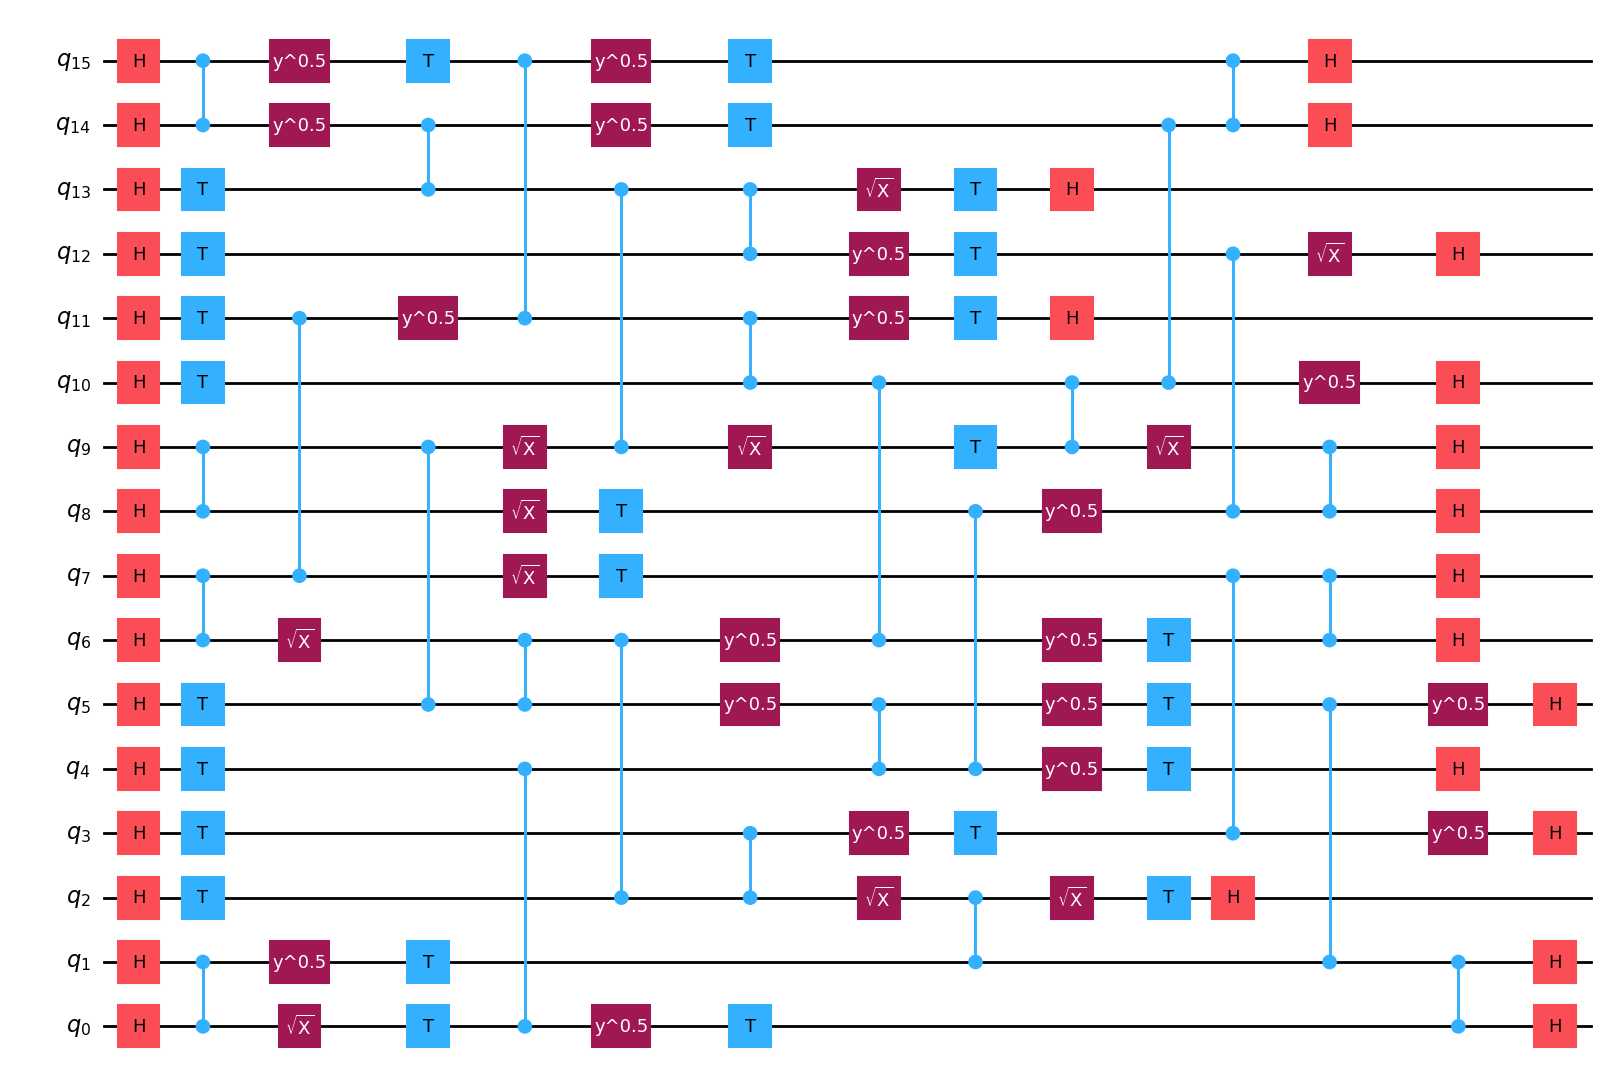

In [29]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit
from qiskit.circuit.library import YGate
from qiskit.quantum_info import Statevector

path = "GRCS/inst/rectangular/cz_v2/4x4/inst_4x4_10_0.txt"

with open(path, 'r') as file:
    nqubits = int(file.readline())

    qc = QuantumCircuit(nqubits)
    for line in file:
        cycle, gate, *qubits = line.split()
        target = nqubits - 1 - int(qubits[0])
        if len(qubits) > 1:
            control = nqubits - 1 - int(qubits[1])
        if gate == 'h':
            qc.h(target)
        elif gate == 'x':
            qc.x(target)
        elif gate == 'y':
            qc.y(target)
        elif gate == 'z':
            qc.z(target)
        elif gate == 't':
            qc.t(target)
        elif gate == "x_1_2":
            qc.sx(target)
        elif gate == "y_1_2":
            qc.append(YGate().power(1/2), [target])
        elif gate == 'cz':
            qc.cz(control, target)
        elif gate == 'cx':
            qc.cx(control, target)
     
# qc.measure_all()
qc.draw(output='mpl', reverse_bits=True)
# Circuits are inverse on qiskit

In [ ]:
from qiskit_aer import QasmSimulator, AerSimulator, StatevectorSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram
import time 

simulator = QasmSimulator()
simulator = AerSimulator(method="statevector")
# simulator = StatevectorSimulator()
circ = transpile(qc, simulator)
start = time.time()
result = simulator.run(circ, shots=1e6).result()
end = time.time()
print("Time taken: ", end-start)

counts = result.get_counts()
counts_ordered = sorted(counts.items(), key=lambda x: x[1], reverse=True)
print(counts_ordered)
# plot_histogram(result.get_counts(), figsize=(10, 5))

In [62]:
import time 
start = time.time()
sv = Statevector.from_instruction(qc)
bits = sv.probabilities_dict().keys()
print(time.time() - start)
l = list(zip(bits, sv.data))
for i in l[:20]:
    print(i)
    

prob = np.abs(sv.data**2)
prob_sorted = sorted(prob, reverse=True)
print(prob_sorted[:20])

0.29569530487060547
(np.str_('0000000000000000'), np.complex128(0.0006067581480074609+0.0024168688810087065j))
(np.str_('0000000000000001'), np.complex128(-0.002130840347011198+0.002071601898007466j))
(np.str_('0000000000000010'), np.complex128(0.006263880432004978+0.002619121597011188j))
(np.str_('0000000000000011'), np.complex128(0.0025006446990037175-0.010204831512017426j))
(np.str_('0000000000000100'), np.complex128(0.0019878260800124457+0.001203352584993776j))
(np.str_('0000000000000101'), np.complex128(0.006727624313013676-0.009716550262017424j))
(np.str_('0000000000000110'), np.complex128(0.004596783966002486-0.0002614911650062201j))
(np.str_('0000000000000111'), np.complex128(0.0012380536650062174+8.377581799501965e-05j))
(np.str_('0000000000001000'), np.complex128(0.0053046684720111995-0.003435319290006225j))
(np.str_('0000000000001001'), np.complex128(-0.0023995183410024912+0.0033760808410024964j))
(np.str_('0000000000001010'), np.complex128(-0.0006731834259962671-0.002863262

## Other

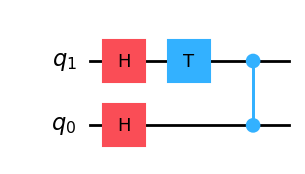

In [52]:
n = 2
qc1 = QuantumCircuit(n)
for i in range(n):
    qc1.h(i)

qc1.t(1)
# qc1.z(0)
qc1.cz(0, 1)

# qc1.append(YGate().power(1/2), [1])
qc1.draw(output='mpl', reverse_bits=True)

In [53]:

sv = Statevector.from_instruction(qc1)
bits = sv.probabilities_dict().keys()
l = list(zip(bits, sv.data))
for i in l[:20]:
    print(i)

(np.str_('00'), np.complex128(0.4999999999999999+0j))
(np.str_('01'), np.complex128(0.4999999999999999+0j))
(np.str_('10'), np.complex128(0.3535533905932737+0.3535533905932737j))
(np.str_('11'), np.complex128(-0.3535533905932737-0.3535533905932737j))


In [60]:
n = 1
qc2 = QuantumCircuit(n)
for i in range(n):
    qc2.h(i)

qc2.z(0)
# qc2.z(0)
# qc2.cz(0, 2)

sv = Statevector.from_instruction(qc2)
bits = sv.probabilities_dict().keys()
l = list(zip(bits, sv.data))
for i in l[:20]:
    print(i)


(np.str_('0'), np.complex128(0.7071067811865475+0j))
(np.str_('1'), np.complex128(-0.7071067811865475+0j))
